## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [ ]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
# Review the dataset information
diabetes_data = pd.read_csv('data/diabetes.csv')

diabetes_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [7]:
diabetes_data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [8]:
# Replace zeros with NaN in the specified columns
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[columns_to_replace] = diabetes_data[columns_to_replace].replace(0, np.nan)

# Verify the replacement by showing a summary of missing values
print(diabetes_data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


**<font color='teal'> Plot histograms of each column. </font>**

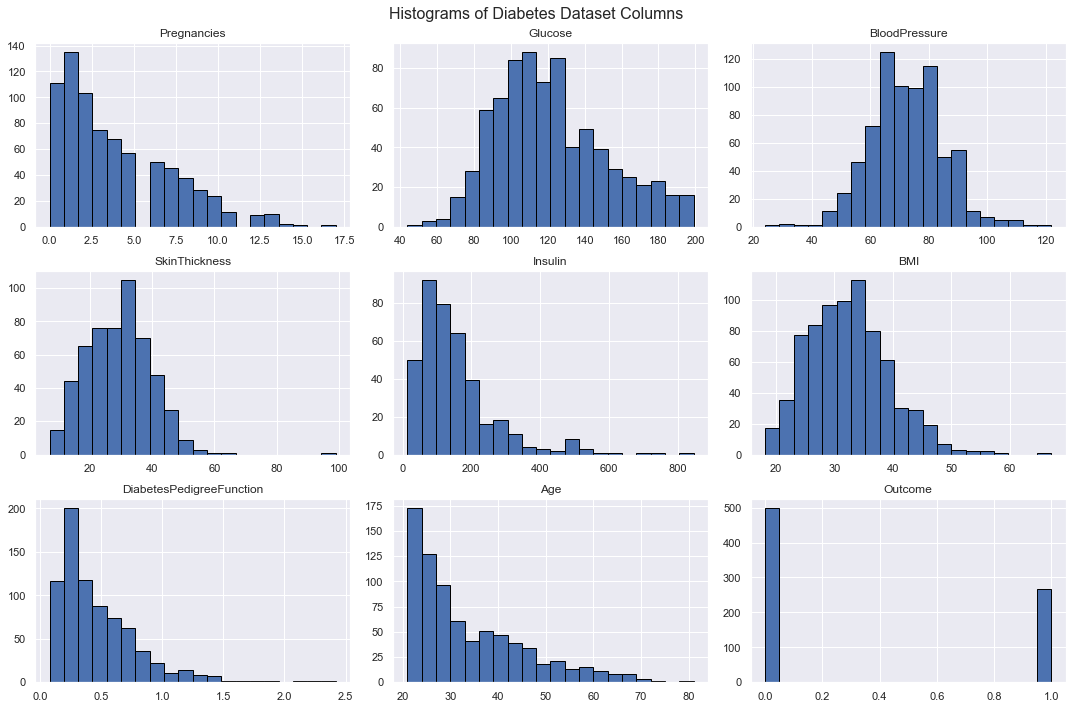

In [9]:
diabetes_data.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Diabetes Dataset Columns', fontsize=16)
plt.tight_layout()
plt.show()

#### Replace the zeros with mean and median values.

In [10]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

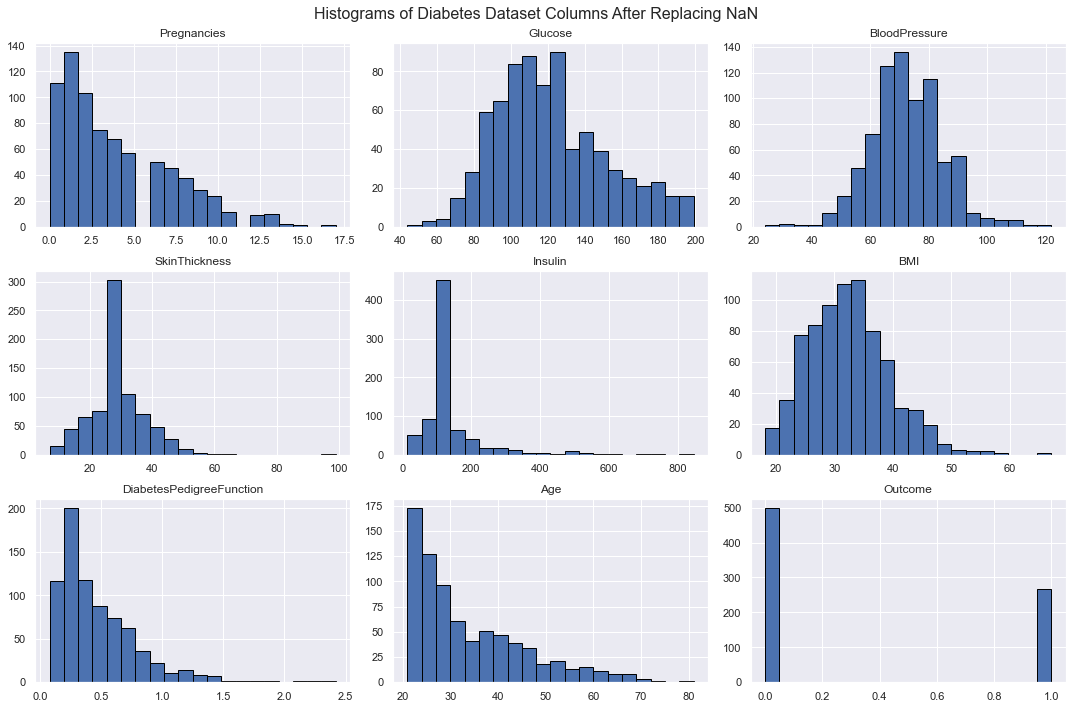

In [11]:
# Plot histograms for each column after replacing NaN values
diabetes_data.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Diabetes Dataset Columns After Replacing NaN', fontsize=16)
plt.tight_layout()
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


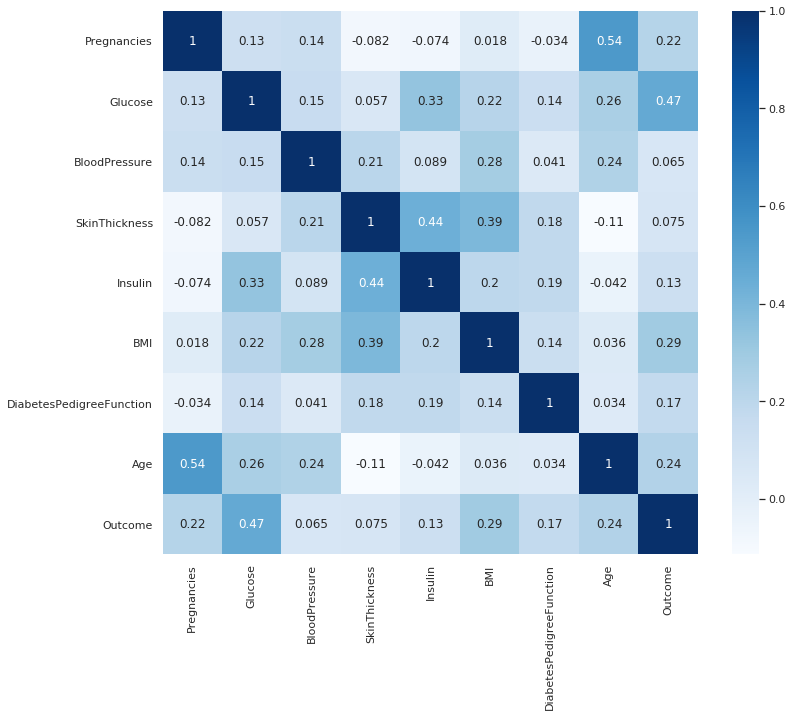

In [15]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [12]:
# Define the target variable y as the Outcome column
y = diabetes_data['Outcome']

# Display the first few values of y
print(y.head())


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


**<font color='teal'> Create a 70/30 train and test split. </font>**

In [13]:
from sklearn.model_selection import train_test_split

# Define the feature variables X (drop 'Outcome') and target variable y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split the dataset into 70% training and 30% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (537, 8)
X_test shape: (231, 8)
y_train shape: (537,)
y_test shape: (231,)


**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Convert the scaled training data to a DataFrame for better visualization
scaled_features = pd.DataFrame(X_train_scaled, columns=X.columns)
print(scaled_features.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.836294 -0.896108      -1.004400      -1.269545 -0.956993 -1.203826   
1     0.390728 -0.563997      -0.020266       0.029693  2.136797  0.664498   
2    -1.143050  0.432336      -0.348311       1.565156  1.267755  1.440571   
3     0.083972  0.299491      -0.348311      -0.915207  0.294428  0.118373   
4    -0.836294 -0.630419      -3.464737       1.092706 -0.667312  1.584288   

   DiabetesPedigreeFunction       Age  
0                 -0.614216 -0.948610  
1                 -0.909738 -0.434667  
2                 -0.306991 -0.777296  
3                 -0.906812 -0.434667  
4                 -0.839515 -0.006380  


#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [15]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [16]:
from sklearn.impute import SimpleImputer

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both train and test data
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Perform KNN classification and print train and test scores
test_scores = []
train_scores = []

for i in range(1, 10):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train_imputed, y_train)
    
    train_scores.append(knn.score(X_train_imputed, y_train))
    test_scores.append(knn.score(X_test_imputed, y_test))

# Print the train and test scores for each iteration
for k, train_score, test_score in zip(range(1, 10), train_scores, test_scores):
    print(f"k={k}: Train Score={train_score:.4f}, Test Score={test_score:.4f}")


k=1: Train Score=1.0000, Test Score=0.6667
k=2: Train Score=0.8510, Test Score=0.6710
k=3: Train Score=0.8547, Test Score=0.6710
k=4: Train Score=0.8417, Test Score=0.6926
k=5: Train Score=0.8399, Test Score=0.7013
k=6: Train Score=0.8231, Test Score=0.6840
k=7: Train Score=0.8343, Test Score=0.7316
k=8: Train Score=0.8212, Test Score=0.7359
k=9: Train Score=0.8268, Test Score=0.7316


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Split the dataset into training and testing data
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Step 4: Train KNN with different numbers of neighbors and track scores
test_scores = []
train_scores = []

for i in range(1, 10):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train_imputed, y_train)
    
    train_scores.append(knn.score(X_train_imputed, y_train))
    test_scores.append(knn.score(X_test_imputed, y_test))

# Step 5: Identify the number of neighbors that resulted in the max score in the training dataset
max_train_score = max(train_scores)
optimal_k_train = train_scores.index(max_train_score) + 1  # Adding 1 because index starts at 0

print(f"Maximum Training Score: {max_train_score:.4f}")
print(f"Optimal k (number of neighbors): {optimal_k_train}")


Maximum Training Score: 1.0000
Optimal k (number of neighbors): 1


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Split the dataset into training and testing data
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Step 4: Train KNN with different numbers of neighbors and track scores
test_scores = []
train_scores = []

for i in range(1, 10):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train_imputed, y_train)
    
    train_scores.append(knn.score(X_train_imputed, y_train))
    test_scores.append(knn.score(X_test_imputed, y_test))

# Step 5: Identify the number of neighbors that resulted in the max score in the testing dataset
max_test_score = max(test_scores)
optimal_k_test = test_scores.index(max_test_score) + 1  # Adding 1 because index starts at 0

print(f"Maximum Testing Score: {max_test_score:.4f}")
print(f"Optimal k (number of neighbors): {optimal_k_test}")


Maximum Testing Score: 0.7359
Optimal k (number of neighbors): 8


Plot the train and test model performance by number of neighbors.

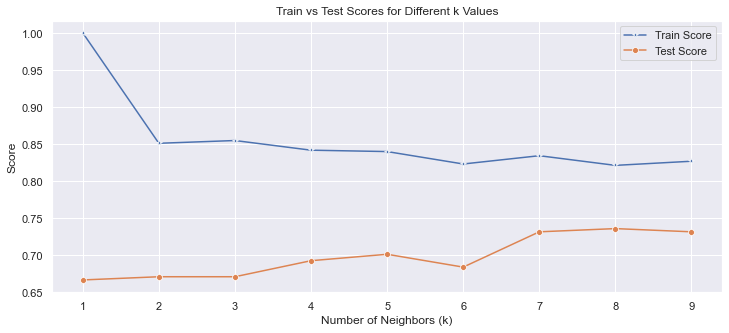

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Split the dataset
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Step 4: Train KNN and track scores
train_scores = []
test_scores = []
for i in range(1, 10):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train_imputed, y_train)
    train_scores.append(knn.score(X_train_imputed, y_train))
    test_scores.append(knn.score(X_test_imputed, y_test))

# Step 5: Plot train and test scores
plt.figure(figsize=(12, 5))
sns.lineplot(x=range(1, 10), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1, 10), y=test_scores, marker='o', label='Test Score')
plt.title('Train vs Test Scores for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.legend()
plt.show()


**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Split the dataset
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Step 4: Train KNN and track scores
train_scores = []
test_scores = []

for i in range(1, 10):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train_imputed, y_train)
    train_scores.append(knn.score(X_train_imputed, y_train))
    test_scores.append(knn.score(X_test_imputed, y_test))

# Step 5: Determine the best k
best_k = test_scores.index(max(test_scores)) + 1  # Adding 1 because index starts at 0

# Step 6: Fit the model with the best k and score it
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_imputed, y_train)
best_score = best_knn.score(X_test_imputed, y_test)

print(f"Best k: {best_k}")
print(f"Best Test Score: {best_score:.4f}")


Best k: 8
Best Test Score: 0.7359


In [23]:
# Predict the target values for the test set using the best model
y_pred = best_knn.predict(X_test_imputed)

# Compute the confusion matrix
pl = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(pl)

[[126  25]
 [ 36  44]]


**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

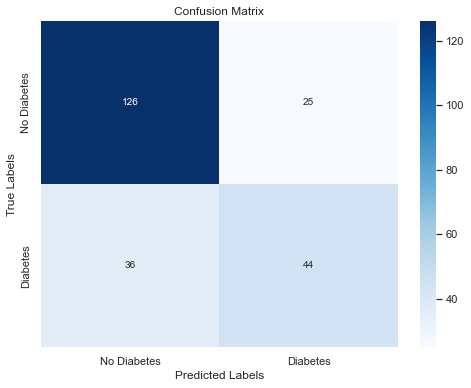

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure y_pred and confusion matrix are calculated
y_pred = best_knn.predict(X_test_imputed)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**<font color='teal'> Print the classification report </font>**

In [25]:
from sklearn.metrics import classification_report

# Ensure y_pred is defined
y_pred = best_knn.predict(X_test_imputed)

# Print the classification report
classification_rep = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes'])
print(classification_rep)


              precision    recall  f1-score   support

 No Diabetes       0.78      0.83      0.81       151
    Diabetes       0.64      0.55      0.59        80

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [28]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the pipeline for preprocessing and modeling
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler()),                # Scale features
    ('rf', RandomForestClassifier(random_state=42))  # Random Forest classifier
])

# Define the parameter grid for GridSearch
param_grid_rf = {'rf__n_estimators': np.arange(10, 201, 10)}  # Testing between 10 and 200 trees

# Perform GridSearch with 5-fold cross-validation
rf_cv = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy')
rf_cv.fit(X, y)

# Print the best parameters and the best score
print(f"Best Parameters: {rf_cv.best_params_}")
print(f"Best Cross-Validation Score: {rf_cv.best_score_:.4f}")


Best Parameters: {'rf__n_estimators': 30}
Best Cross-Validation Score: 0.7696
